In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw01.ipynb")

# **Homework 1: Pandas and Plotting**

## Due Monday Jan 22nd at 11:59pm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Point Breakdown (44 pts total)
- Q0: 3 pts
- Q1a: 3 pts
- Q1b: 3 pts
- Q1c: 5 pts
- Q1d: 5 pts
- Q1e: 5 pts
- Q1f: 10 pts
- Q1g: 10 pts

## Helpful Resources:

- [Python Examples](https://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/Python_101.ipynb): A reference for distinct Python commands (worth returning to throughout this course)

- [Essential, concise Pandas Reference](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)




<!-- BEGIN QUESTION -->

---
## Question 0: Connecting with this week's homework partners (3 pts)
Chat (or email) with your homework partner(s) this week to check in about the assignment. Check the class roster on Canvas if you can't find them during class. Ask or try to answer any homework questions you/they have. In addition, please find a bit more about them and share below. <br>
 * Where were they born?
 * Their favorite nonschool activity?
 * Their favorite spot in Corvallis?<br>
 <br>
 
Homework partners are:

```
['Madelyn', 'Shreetama'],
['Karly', 'Siena'],
['Samuel', 'Jesse'],
['Morgan', 'Lucas'],
['Andy', 'Blake'],
['Alaina', 'Kyle'],
['Emmanuela', 'Aine'],
['Andrea V.', 'Kili'],
['Imre', 'Marina'],
['Finn', 'Hadrian'],
['Colin', 'Lexie'],
['Alexis', 'Rachel'],
['Sarah', 'James'],
['Alex', 'Brenly'],
['Tyler', 'Andrea S.'],
['Kaya', 'Lindsey'],
['Maximilian', 'Olivia'],
['Riley', 'Chandra']

```

   
Type out their answers in a Markdown Cell below.

Imre was born in Portland, Oregon. Their favorite nonschool activities are cooking and watching improv. In Corvallis, they like to find cozy, low traffic corners on campus to hang out.

<!-- END QUESTION -->

## Question 1: Analyzing Covid-19 infections with Pandas

### Question 1a: Loading Data (3 pts)
The `state_data.csv` file in the `hw01` directory contains daily data about new Covid-19 infections across all 50 states from January 2020 to January 2023. These data are from a [repository](https://github.com/nytimes/covid-19-data) maintained by the New York Times. CSV stands for comma separated values, and the file can be opened with a spreadsheet application on Jupyter notebook.<br> The specific columns we will focus on are `state`, `cases_avg_per_100k`, and `years_since_jan1_2020`. The`cases_avg_per_100k` column is the rolling 7-day average of positive Covid-19 infections reported by state health authorities per 100,000 residents.<br>
Read the `state_data.csv` file into Python as a Pandas dataframe using the `read_csv` method. Assign the resulting data frame to the variable `state_df`.


In [5]:
state_df = pd.read_csv('state_data.csv')

In [6]:
grader.check("q1a")

q1a results: All test cases passed!

The `head()` and `tail()` methods of the Data Frame class are a good way to inspect the dataframe.

In [22]:
state_df.head(5)

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,years_since_jan1_2020
0,2020-01-21,USA-53,Washington,1,0.14,0.0,0,0.0,0.0,0.054795
1,2020-01-22,USA-53,Washington,0,0.14,0.0,0,0.0,0.0,0.057534
2,2020-01-23,USA-53,Washington,0,0.14,0.0,0,0.0,0.0,0.060274
3,2020-01-24,USA-53,Washington,0,0.14,0.0,0,0.0,0.0,0.063014
4,2020-01-24,USA-17,Illinois,1,0.14,0.0,0,0.0,0.0,0.063014


In [23]:
state_df.tail(7)

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,years_since_jan1_2020
57847,2023-01-09,USA-09,Connecticut,244,808.43,22.67,0,5.29,0.15,3.024658
57848,2023-01-09,USA-08,Colorado,1000,491.29,8.53,23,4.20,0.07,3.024658
57849,2023-01-09,USA-06,California,5135,7537.13,19.08,60,51.70,0.13,3.024658
57850,2023-01-09,USA-05,Arkansas,194,475.86,15.77,0,3.71,0.12,3.024658
57851,2023-01-09,USA-04,Arizona,0,883.86,12.14,0,18.43,0.25,3.024658
57852,2023-01-09,USA-02,Alaska,0,52.00,7.11,0,0.00,0.00,3.024658
57853,2023-01-09,USA-01,Alabama,0,1306.43,26.64,0,3.93,0.08,3.024658


### Question 1b: Exploring Data (3 pts)
Use code to query the number of rows and columns of the data frame. Assign the variable `num_row` to the number of rows and `num_col` to the number of columns. Finally, assign a variable `columns` to the names of the columns.

In [8]:
num_row = state_df.shape[0]
num_col = state_df.shape[1]
columns = state_df.columns

print(f"Number of rows is: {num_row}") 
print(f"Number of columns is: {num_col}")
print(f"Columns are: {', '.join(list(columns))}")

Number of rows is: 57854
Number of columns is: 10
Columns are: date, geoid, state, cases, cases_avg, cases_avg_per_100k, deaths, deaths_avg, deaths_avg_per_100k, years_since_jan1_2020


In [9]:
grader.check("q1b")

q1b results: All test cases passed!

### Question 1c: Setting up Data For Plotting (5 pts)
It can often be advantageous to split up large data frames into subsets.<br> Create data frames specific to data from Oregon, California, and New York with respective names
of `ca_df`, `ny_df`, `or_df`

In [10]:
# Create data frame with data only from Oregon
or_df = state_df[state_df['state'] == 'Oregon']

# Create data frame with data only from California
ca_df = state_df[state_df['state'] == 'California']

# Create data frame with data only from New York
ny_df = state_df[state_df['state'] == 'New York']

In [11]:
grader.check("q1c")

q1c results: All test cases passed!

### Question 1d: Plotting Data (5 pts)
On our given axis (ax1d), plot three time-series of infections over time. Plot data from column `cases_avg_per_100k` on the vertical axis and `years_since_jan1_2020` on the horizontal (x) axis.<br>
Use `ax1d.set_xlabel` and `ax1d.set_ylabel` to set appropriate labels for x and y axes and `ax1d.legend` to label each time-series with the state names.

Your plot Should look like this (you don't have to match the colors)

![](./1d_graph.png)

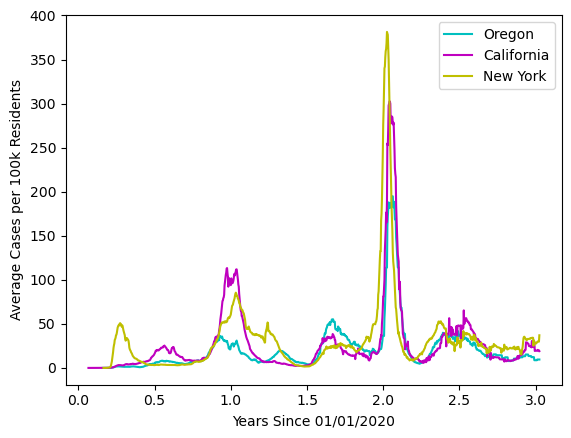

In [12]:
# USE THIS axis
ax1d = plt.axes()

ax1d.plot(or_df['years_since_jan1_2020'], or_df['cases_avg_per_100k'],color='c',label='Oregon')
ax1d.plot(ca_df['years_since_jan1_2020'], ca_df['cases_avg_per_100k'],color='m',label='California')
ax1d.plot(ny_df['years_since_jan1_2020'], ny_df['cases_avg_per_100k'],color='y',label='New York')

ax1d.set_xlabel('Years Since 01/01/2020')
ax1d.set_ylabel('Average Cases per 100k Residents')
ax1d.legend()

In [37]:
grader.check("q1d")

q1d results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 1e: Qualitative inspection of the data (5 pts)
1. In the above plot, how many approximate distinct peaks - or "surges" in infections are there for:
    - New York?
    - California?
    - Oregon?
2. Are there peaks that are roughly aligned in time with each other? Are there examples of peaks that are not well aligned? 

3. What is the order across the three states in which the Omicron-driven surge began in December 2021 (two years after 1/01/20)?<br>

**Note:** Don't worry about exact answers, as these answers are subjective. Just make your best effort to explain what you observe for full credit.


I would say that New York has four distinct peaks, California has five, and Oregon has four. In general, the peaks are roughly aligned in time with each other, but there are some peaks that are more individual. One example of this is New York's first peak, which is earlier than the first peaks of the other states. It appears that the surge in December 2021 started with New York, then California, then Oregon.

<!-- END QUESTION -->

### Question 1f: Writing a function that will plot the data for any arbitrary state (10 pts)

Define a function named `state_plot` that:
1. Takes two inputs (`state_df` and `state`)
    - `state_df`, a dataframe with all the state data, as generated above
    - `state`,  a string with a specific state name
  
2. Subsets the input data frame to get data corresponding to the specific input state (as done above).
  
3. With this state-specific data frame:  
    -  Plot time-series data with `cases_avg_per_100k` on the vertical axis and `years_since_jan1_2020` on the horizontal axis. Make sure that the axes get labelled and that there is a legend with the input state name.
4. Returns the state-specific data frame.
  


,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,years_since_jan1_2020
494,2020-03-11,USA-56,Wyoming,1,0.14,0.02,0,0.0,0.0,0.191781
539,2020-03-12,USA-56,Wyoming,0,0.14,0.02,0,0.0,0.0,0.194521
587,2020-03-13,USA-56,Wyoming,1,0.29,0.05,0,0.0,0.0,0.197260
639,2020-03-14,USA-56,Wyoming,1,0.43,0.07,0,0.0,0.0,0.200000
692,2020-03-15,USA-56,Wyoming,0,0.43,0.07,0,0.0,0.0,0.202740
...,...,...,...,...,...,...,...,...,...,...
57579,2023-01-05,USA-56,Wyoming,0,43.43,7.50,0,0.0,0.0,3.013699
57635,2023-01-06,USA-56,Wyoming,0,43.43,7.50,0,0.0,0.0,3.016438
57691,2023-01-07,USA-56,Wyoming,0,43.43,7.50,0,0.0,0.0,3.019178
57747,2023-01-08,USA-56,Wyoming,0,43.43,7.50,0,0.0,0.0,3.021918


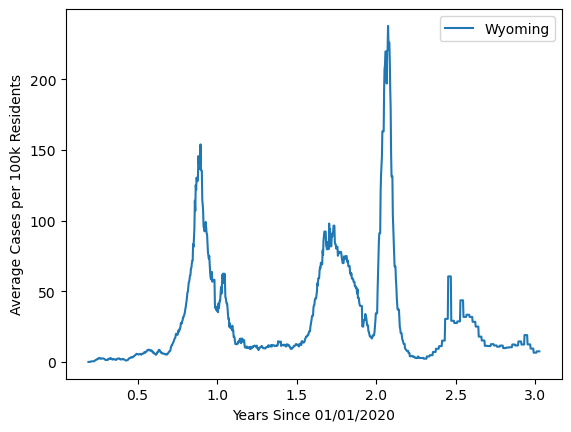

In [52]:
def state_plot(state_df,state):
    state_name = state
    state = state_df[state_df['state'] == state]
    ax = plt.axes()
    ax.plot(state['years_since_jan1_2020'], state['cases_avg_per_100k'], label=state_name)
    ax.set_xlabel('Years Since 01/01/2020')
    ax.set_ylabel('Average Cases per 100k Residents')
    plt.legend()
    return state

# Test your function out with states of your choice...
returned_df = state_plot(state_df, 'Wyoming')
returned_df


In [53]:
grader.check("q1f")

q1f results: All test cases passed!

<Figure size 640x480 with 0 Axes>

### Question 1g: Writing a function that plots the data for multiple states (10 pts)

Define a function named `plot_and_analyze_states` that:
- Takes two inputs (`state_df` and `states_list`)
    - `state_df`, a dataframe with all the state data, as generated above
    - `states_list`,  a list of strings with specific state names. This list could be of any length though we suggest you test your function with 2-5 states. 
  
- Contains a for loop so that for each state in the list, the function subsets the input data frame to get state-specific data frame (which can be overwritten each time through the for loop).
- With that state-specific data frame, you should:
    -  Plot `Average cases per 100k residents` on the vertical axis and `years since jan1 2020` on the horizontal axis, as above.
    - Determine the maximum of the average cases reported.
    - Save this value to a dictionary`, where the dictionary keys are state names and the dictionary values are the infection maxima. 
    
- The function should return this dictionary.




{'Rhode Island': 506.81, 'Virginia': 220.04, 'North Carolina': 302.11, 'New Hampshire': 256.87}


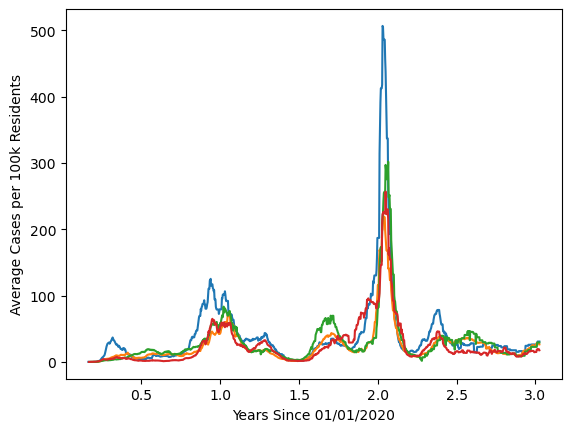

In [58]:

def plot_and_analyze_states(state_df, states_list):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    max_dict = {}
    for state in states_list:
        df_subset=state_df[state_df['state']==state]
        ax.plot(df_subset['years_since_jan1_2020'], df_subset['cases_avg_per_100k'],label=state)
        
        max=0
        cases_df= df_subset['cases_avg_per_100k']
        for case in cases_df:
            if case > max:
                max=case
        max_dict[state]=max
        
    ax.set_xlabel('Years Since 01/01/2020')
    ax.set_ylabel('Average Cases per 100k Residents')
    
    return max_dict
    

    
#This is just an example, you should try your function on other states
states_list=['Rhode Island','Virginia','North Carolina', 'New Hampshire']
max_infection_dict=plot_and_analyze_states(state_df,states_list)
       
print(max_infection_dict)


In [59]:
grader.check("q1g")

q1g results: All test cases passed!

<Figure size 640x480 with 0 Axes>

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)